In [39]:
#normalização

import pandas as pd
import numpy as np

insights_data = pd.read_csv('insights-data.csv')


In [40]:
#NORMALIZANDO DATASET
import numpy as np
from sklearn.preprocessing import normalize

data=[]
cols = list(insights_data.columns.values)
nomes = {}
for index, row in insights_data.iterrows():
    nome=result = ''.join(i for i in row['filename'] if not i.isdigit())
    nome=nome.replace(".txt","").replace(".","")
    nomes[str(nome)] = str(nome)
    
pdDataset_norm = insights_data
for key, value in nomes.items():
    record={}
    record_metrics={}
    for col in cols:
        times={} 
        if (col not in ["amostra","filename","time","class","insigths","segment"]):
            x = insights_data[insights_data['filename'].str.startswith(value)][col].astype(float).values
            vals = x / x.max()
            row_index = pdDataset_norm['filename'].str.startswith(value)
            pdDataset_norm.loc[row_index, col] = vals




In [41]:
#salvando
pdDataset_norm.to_csv('insights-data-norm.csv')
pdDataset_norm.head()


,amostra,filename,time,class,insigths,segment,wc,wps,i,we,...,posemo,negemo,anx,sad,cogmech,insight,cause,discrep,tentat,certain
0,Daniela,and01.txt,-10,0,0,1,0.620347,0.548421,0.638821,0.304183,...,0.864346,0.100000,0.000000,0.000000,0.885453,0.496552,0.608365,0.392157,0.168067,1.000000
1,Daniela,and02.txt,-9,0,0,1,0.540943,0.637368,0.788698,0.174905,...,0.440576,0.057500,0.000000,0.062078,0.854181,0.315862,0.174905,0.449580,0.514006,0.763889
2,Daniela,and03.txt,-8,0,0,1,0.034739,0.245789,0.877764,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.752987,0.984828,0.000000,1.000000,1.000000,0.000000
3,Daniela,and04.txt,-7,0,0,1,1.000000,0.451053,0.883907,0.000000,...,0.655462,0.216875,0.000000,0.067476,0.994027,0.718621,0.566540,0.591036,0.452381,0.688889
4,Daniela,and05.txt,-6,0,0,1,0.270471,0.637368,0.507371,0.000000,...,0.219688,0.343750,0.604396,0.000000,0.741391,0.506207,0.174905,0.256303,0.642857,0.763889


In [42]:
#CRIANDO ESTRUTURA DADOS PARA PLOT
import numpy as np
from sklearn.preprocessing import normalize

#insights_data.head(1000)
data=[]
cols = list(pdDataset_norm.columns.values)
nomes = {}
for index, row in pdDataset_norm.iterrows():
    nome=result = ''.join(i for i in row['filename'] if not i.isdigit())
    nome=nome.replace(".txt","").replace(".","")
    nomes[str(nome)] = str(nome)
    
    

print (nomes)
for key, value in nomes.items():
    record={}
    record_metrics={}
    for col in cols:
        times={}
        if (col not in ["amostra","filename","time","class","insigths","segment"]):
            x = pdDataset_norm[insights_data['filename'].str.startswith(key)].sort_values('time', ascending=True)[col].values
            vals = x 
            
            time = pdDataset_norm[pdDataset_norm['filename'].str.startswith(key)].sort_values('time', ascending=True)["time"].values
            for index, t in np.ndenumerate(time):
                times[t]=vals[index]
                #print index, t
                
            record_metrics[col] =times
    record['metrics'] =record_metrics
    record['nome'] =value
    #print (nome)
    data.append(record)
    


{'and': 'and', 'fwufferzpost': 'fwufferzpost', 'sarahjane-finch': 'sarahjane-finch', 'mat': 'mat', 'angel': 'angel', 'melllo': 'melllo', 'raven': 'raven', 'cpost': 'cpost', 'nunca': 'nunca', 'queen': 'queen', 'june': 'june', 'bpost': 'bpost', 'hydra': 'hydra', 'cposta': 'cposta', 'bq': 'bq', 'pice': 'pice', 'post': 'post', 'kari': 'kari', 'mam': 'mam', 'perf': 'perf'}


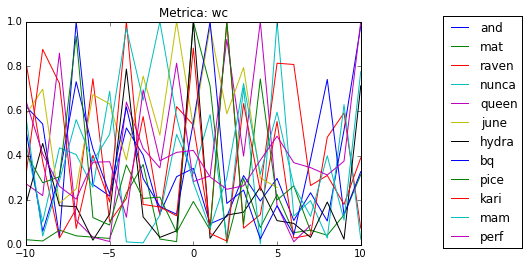

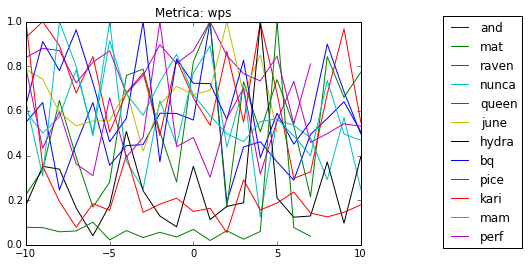

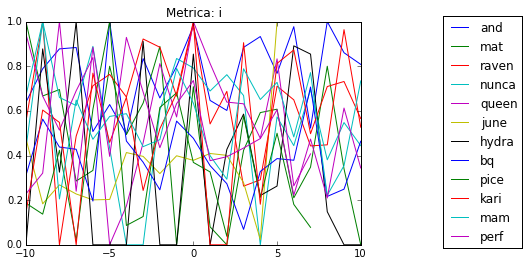

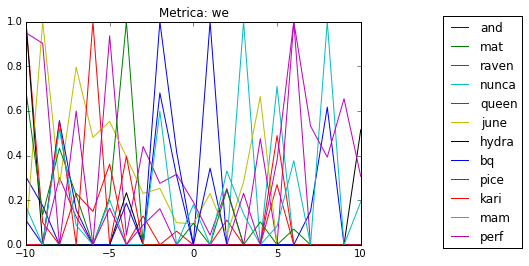

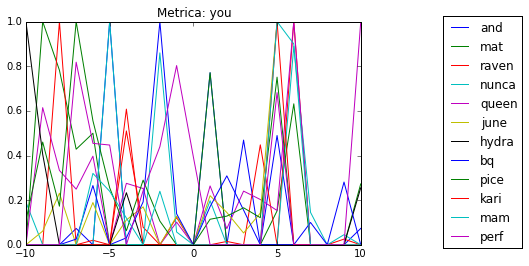

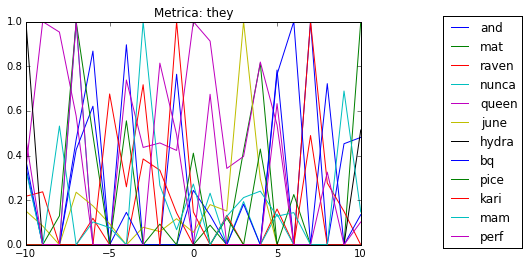

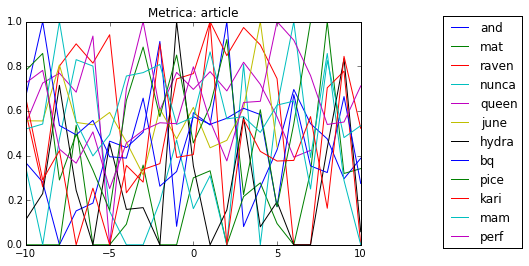

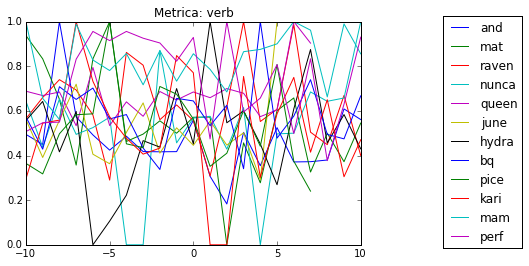

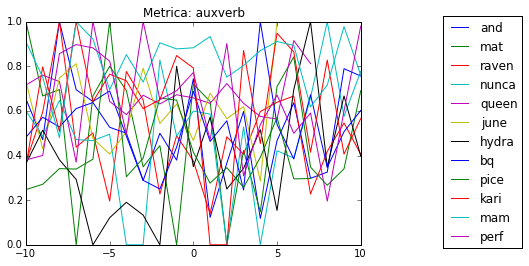

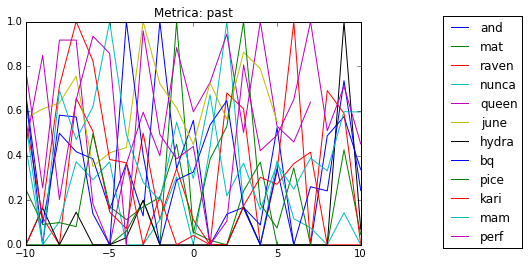

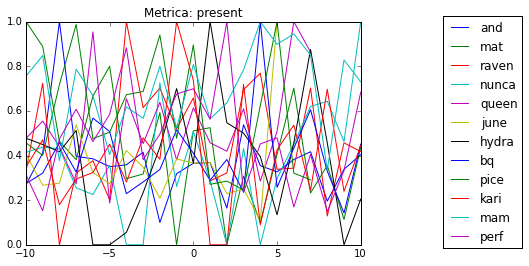

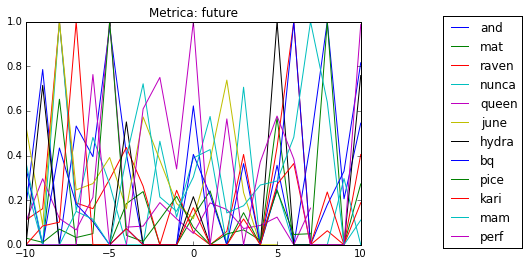

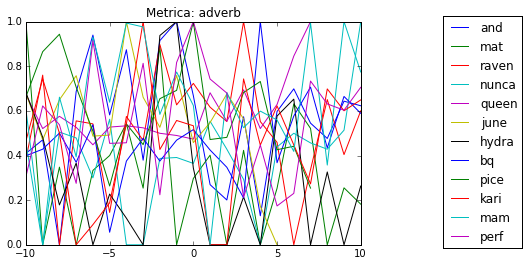

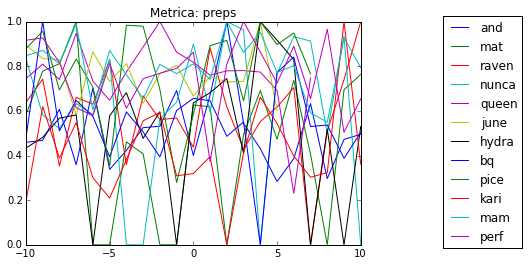

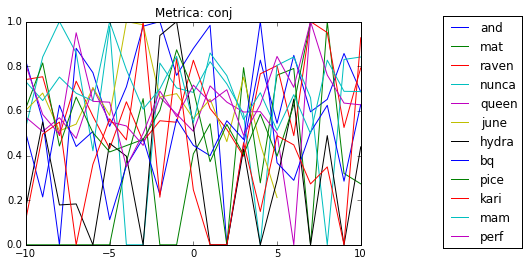

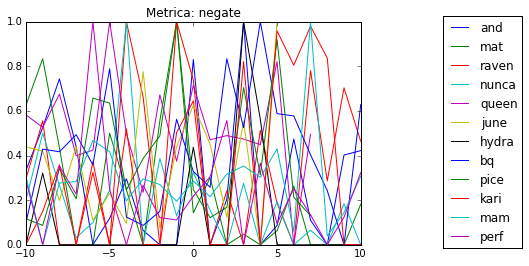

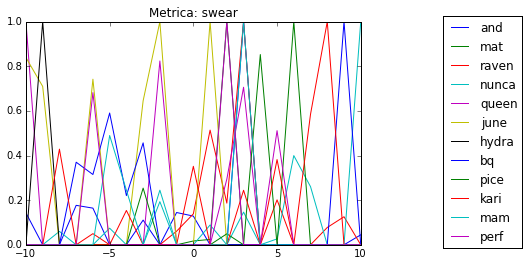

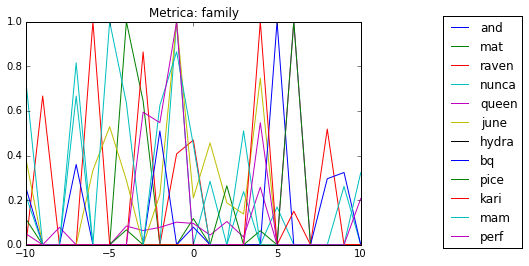

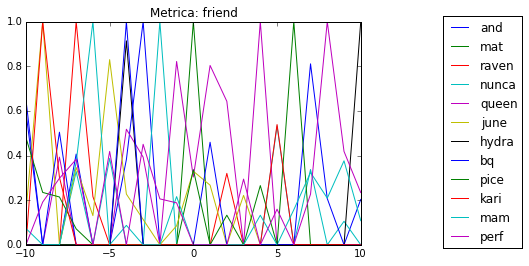

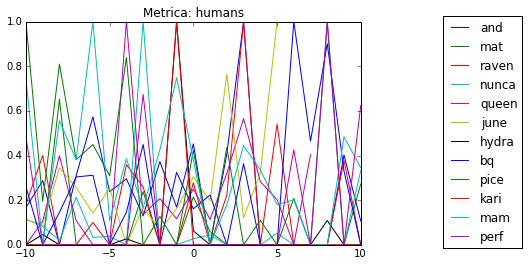

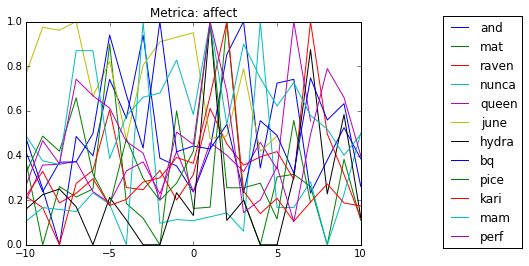

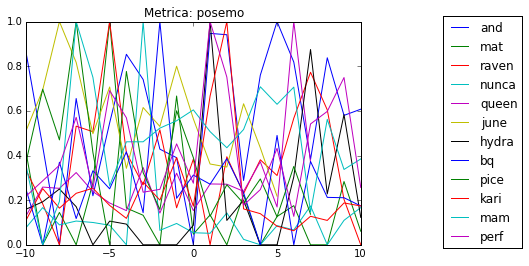

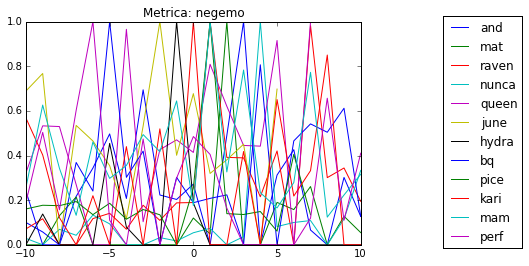

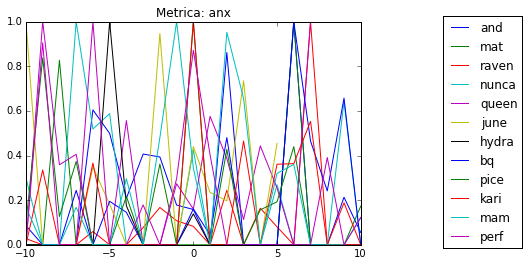

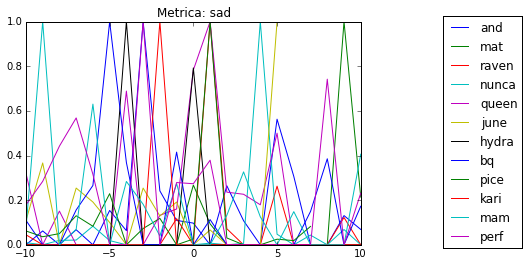

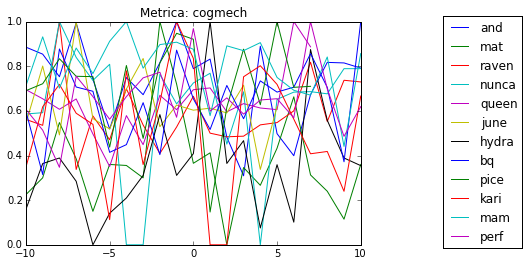

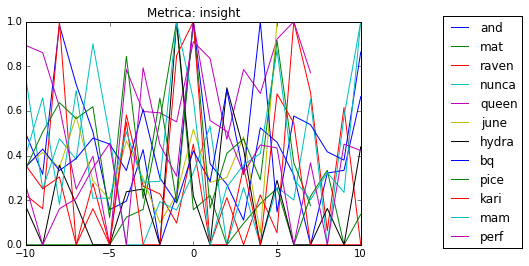

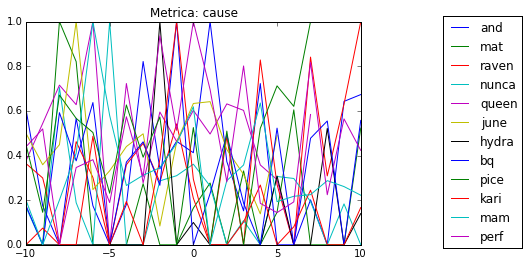

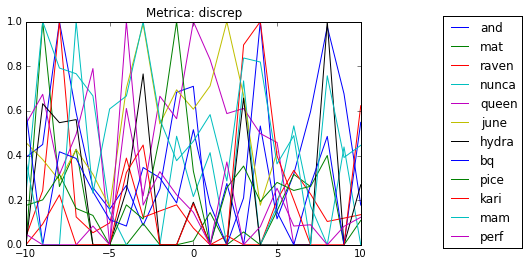

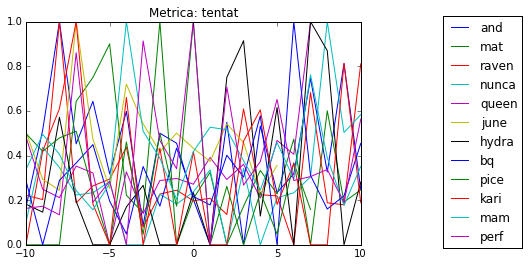

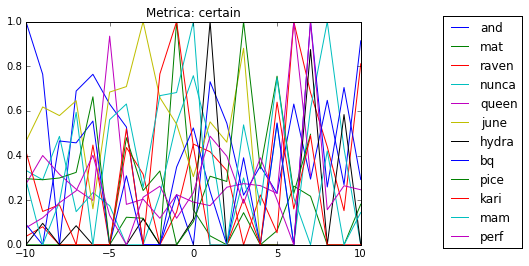

In [46]:
%matplotlib inline

import collections
import matplotlib.pyplot as plt 
cols = list(insights_data.columns.values)

for col in cols:
    if (col not in ["amostra","filename","time","class","insigths","segment"]):
        count=0
        for x in data:
 
            yp = np.array(collections.OrderedDict(sorted(x['metrics'][col].items())).values()).astype(np.float)
            xp= np.array(collections.OrderedDict(sorted(x['metrics'][col].items())).keys()).astype(np.float)
            #print (xp.tolist())
            #print (yp.tolist())
            if (len(xp)>15):
                plt.plot(xp.tolist(),yp.tolist(),label=x['nome'])
                plt.title("Metrica: "+ col)
                plt.legend(bbox_to_anchor=(1.5, 1.05))
                count=count+1
    plt.show()
